# Cities

In [1]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

Let's load some columns from the cities.csv file


In [2]:
city, country,latitude,longitude,pop = np.loadtxt('cities.csv', delimiter=',', dtype=str,unpack=True )
print(pop)
#loads datafile with corresponding labels
#print pop is performed just to verify that values are correct

['35676000' '19354922' '19028000' ... '10' '10' '10']


## Assignment 3: Big Cities 

Use numpy tools to obtain the following from the cities database:

a) A list of the 10 most populous cities in China (code CHN), and their populations

b) A list of the 5 countries with the greatest number of cities in the database.

c) A histogram, showing the breakdown of city sizes, for the country with the most cities.  
_Hint: For the best results here, you may need to manually change the binsizes and/or axes scales to logarithmic._



In [3]:
china=np.where(country=='CHN')
china_pop=pop[china]
city_china=city[china]
#filters cities in china and populations in china
print ('%-10s %-10s' % ('Population',  '||Chinese City'))
print('---------------------------')
for i in range(10):
    print  (china_pop[i],' ','||','', city_china[i] )
#since the file is already ordered from highest population to lowest population we can just take the first 10 values
#a list of these is shown by the print command with || separating each corresponding value for clarity

Population ||Chinese City
---------------------------
14987000   ||  Shanghai
11106000   ||  Beijing
8829000   ||  Guangzhou
7581000   ||  Shenzhen
7243000   ||  Wuhan
7180000   ||  Tianjin
6461000   ||  Chongqing
4787000   ||  Shenyang
4528000   ||  Dongguan
4123000   ||  Chengdu


In [4]:
unique_country=np.unique(country)
#finds each unique value for country that could occur
country_list=[]
#empty list
for countries in unique_country:
    country_list.append(np.count_nonzero(country==countries))
#print(country_list)
#makes a count of number of times a country's code is called, allowing us to know how many cities were analysed


In [5]:
cities_per_country=[]
zipped_country_cities=zip(unique_country,country_list)
for something in zipped_country_cities:
    cities_per_country.append(something)
#creates list of tuples in cities_per_country to make sorting easier
cities_per_country_in_order=sorted(cities_per_country,reverse=True, key=lambda x: x[1])
#sorts the list of tuples in descending order from the second value in each tuple
for i in range(5):
    print(cities_per_country_in_order[i])
#prints 5 countries with largest amount of cities and their amounts

('USA', 7327)
('RUS', 564)
('CHN', 392)
('BRA', 387)
('CAN', 249)


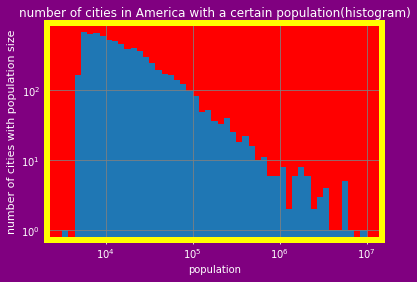

In [7]:
America=np.where(country=='USA')
#condition where values must correspond to the USA
cities_america=city[America]
population_city_america=pop[America]
#returns cities and populations that only correspond to american values

float_pop_city_america = population_city_america.astype('float64')
#makes population a float so it's easier to process
fig = plt.figure(1)
ax = fig.add_subplot(111)
#makes figure
ax.hist(float_pop_city_america, bins=10**np.linspace(3.5,7))
#makes a semilog plot from 10^3.5 to 10^7
#this limit was determined manually after seeing which ones returned the best figure
ax.set_xscale('log')
#sets x scale to log as large values are being dealt with, with a wide spread
#need to discern smaller values
ax.set_yscale('log')
#y scale is in log notation too as some larger values of population are only present in a 2 digit number of cities
#plots year vs fluctuation for specific date
ax.set_xlabel('population',fontsize='10')
ax.set_ylabel('number of cities with population size',fontsize='11')
#creates x and y labels

ax.spines['bottom'].set_color('yellow')
ax.spines['top'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['right'].set_color('yellow')
ax.spines["bottom"].set_linewidth(6)
ax.spines["top"].set_linewidth(6)
ax.spines["left"].set_linewidth(6)
ax.spines["right"].set_linewidth(6)
#changes colour and thickness of spines
ax.set_facecolor('red')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
#makes x and y ticks visible against purple background
plt.gcf().set_facecolor('purple')
plt.grid(color='grey')
#sets gridlines and background colour
plt.title('number of cities in America with a certain population(histogram)')
plt.show()
#as can be seen, most cities in the US have a population less than 10,000 and bar height decreases as we go
#much fewer cities are in the range of the 100,000s
#and once again, even less cities are in the millions as denoted by the loglog scaling

